# **E-Commerce Traffic Flow Analysis and Optimization for Better Conversions**

### Problem Statement
While the Google Merchandise Store performs well in attracting substantial traffic and maintaining a steady conversion rate, there is an opportunity to enhance these metrics further. **The current traffic flow is effective but may not be fully optimized to maximize conversions and revenue potential.** Identifying and addressing subtle inefficiencies in user behavior and traffic performance could unlock additional growth.

### Goal
The goal of this project is to enhance the performance of the online store by analyzing and optimizing traffic flow to maximize conversions and revenue. This involves identifying high-impact opportunities across traffic channels, user journeys, and product categories to improve efficiency, engagement, and overall profitability while maintaining the store's strong baseline performance.

### Business Problem 
- **Revenue Generation** <br>
  Identifying product categories, regions, or traffic channels that are underperforming.
- **Conversion Optimization** <br>
  Addressing issues in the user journey, specifically drop-offs between product views and completed purchases.
- **Regional Performance Gaps** <br>
  Understanding how different regions (e.g., Americas, Asia, Europe) perform differently in terms of revenue and transactions.
- **Traffic Channel Inefficiencies** <br>
  Recognizing which traffic sources, such as social or affiliate channels, are underperforming in terms of conversions.
- **Device Experience Issues** <br>
  Considering how different devices (desktop, mobile, tablet) affect user experience and engagement.

### Business Objectives
- Increase overall revenue by improving conversions and engagement, especially in underperforming regions and categories.
- Enhance user experience by optimizing the checkout process and device compatibility, ensuring a seamless shopping experience across all devices.
- Improve regional strategies to boost sales in regions like Asia and Europe, focusing on tailored approaches for local markets.
- Optimize traffic channels with low conversion rates, ensuring marketing efforts are targeted efficiently.
- Drive customer loyalty through improved user retention strategies, such as personalized recommendations or promotional offers.

### Proposed Business Solutions
- **Category Optimization** <br>
  Focus marketing efforts on underperforming categories, like Fun and Notebooks & Journals, by enhancing product pages, improving descriptions, running targeted ads, and adjusting pricing strategies.
- **Checkout Process Improvements** <br>
  Simplify the checkout flow by reducing the number of steps, offering multiple payment methods, and optimizing for mobile users. Implement abandoned cart recovery strategies, such as email reminders or discount offers, to encourage users to complete their purchases.
- **Regional Strategy Refinement** <br>
  Develop region-specific campaigns to better engage users in Asia and Europe. This could include localizing product offerings, creating region-tailored promotions, and partnering with local influencers to increase visibility and sales.
- **Traffic Channel Refinement** <br>
  For underperforming channels like Social and Affiliates, rework the targeting strategies by segmenting the audience more effectively, testing different creatives, and improving the relevance of the content. 
- **Device Experience Optimization** <br>
  Ensure the website is fully optimized for all devices, particularly mobile and tablet platforms. Focus on reducing load times, improving navigation, and ensuring that the mobile checkout process is smooth and user-friendly.

### Tools
- BigQuery (working with a nested dataset)
- Python (seaborn, matplotlib for visualisation)

### Expected Business Outcomes
- By improving category visibility and enhancing the shopping experience, the store will likely see an increase in conversion rates, resulting in higher overall revenue.
- Regional performance will improve as more tailored campaigns address the specific preferences of users in Asia and Europe, potentially increasing revenue in those areas.
- The optimization of traffic channels will lead to more efficient marketing spend, higher engagement, and better conversion rates across Social and Affiliates.
- Device experience optimization will result in a more seamless user journey across all devices, reducing bounce rates and encouraging more users to complete purchases, especially on mobile platforms.

### Implementation Timeline and Milestones
**Phase 1: Discovery and Analysis (Weeks 1–3)**
- Collect and analyze existing traffic data, user behavior, and conversion rates.
- Identify key drop-off points in the user journey and underperforming traffic sources or regions.
- Segment data by device, geography, and product categories for deeper insights. 

**Phase 2: Strategy Development (Weeks 4–5)**
- Develop a comprehensive optimization strategy based on analysis findings.
- Prioritize actions based on potential impact on revenue and ease of implementation.
- Set measurable KPIs, such as conversion rate improvement, traffic channel efficiency, and revenue growth targets. 

**Phase 3: Implementation of Optimizations (Weeks 6–11)**
- Improve website user experience and streamline checkout processes.
- Optimize marketing campaigns to better target high-intent users in key traffic channels.
- Implement A/B testing for identified improvements, such as page layouts, CTA designs, and checkout flow changes.

**Phase 4: Monitoring and Adjustments (Weeks 12–15)**
- Track performance metrics against KPIs to evaluate the success of implemented strategies.
- Optimize strategies iteratively based on real-time data and feedback.

**Phase 5: Final Review and Reporting (Weeks 16–17)**
- Compile a comprehensive report summarizing improvements, key insights, and results achieved.
- Present findings to stakeholders and set recommendations for ongoing performance monitoring.

### Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()
dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')
df = client.get_dataset(dataset_ref)

In [3]:
[x.table_id for x in client.list_tables(df)][:5]

['ga_sessions_20160801',
 'ga_sessions_20160802',
 'ga_sessions_20160803',
 'ga_sessions_20160804',
 'ga_sessions_20160805']

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
query_1 = ''' 
SELECT *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20160801`
LIMIT 3
'''
result = client.query(query_1).result().to_dataframe()
result

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,<NA>,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,<NA>,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,<NA>,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged


In [6]:
query_2 = ''' 
SELECT totals
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20160801`
LIMIT 1
'''
result = client.query(query_2).result().to_dataframe()
result
# Зміна параметра відображення
pd.set_option('display.max_colwidth', None)

# Виведення результату
print(result)

                                                                                                                                                                                                                                                                               totals
0  {'visits': 1, 'hits': 24, 'pageviews': 17, 'timeOnSite': 287, 'bounces': None, 'transactions': None, 'transactionRevenue': None, 'newVisits': 1, 'screenviews': None, 'uniqueScreenviews': None, 'timeOnScreen': None, 'totalTransactionRevenue': None, 'sessionQualityDim': None}


### Page Performance Analysis

In [7]:
query_3 = ''' 
SELECT 
    hits.page.pagePath AS page,
    COUNT(*) AS sessions,
    ROUND(SUM(totals.bounces)/COUNT(*), 2) AS bounce_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hits
WHERE hits.type = 'PAGE' AND hits.hitNumber = 1 
GROUP BY page
ORDER BY sessions DESC
LIMIT 10
'''
result = client.query(query_3).result().to_dataframe()
result

,page,sessions,bounce_rate
0,/home,612140,0.50
1,/google+redesign/shop+by+brand/youtube,81512,0.56
2,/google+redesign/apparel/men++s/men++s+t+shirts,20685,0.44
3,/signin.html,16296,0.36
4,/google+redesign/apparel/mens/mens+t+shirts,12691,0.48
5,/basket.html,9431,0.45
6,/google+redesign/drinkware,8833,0.53
7,/google+redesign/bags,8608,0.45
8,/google+redesign/apparel/men++s/men++s+outerwear,6345,0.43
9,/google+redesign/apparel,6326,0.45


**To improve user engagement on the site, attention should be focused on reducing the bounce rate on pages with high values, such as /google+redesign/drinkware (0.53). This can be achieved by optimizing content, improving navigation, and encouraging users to take further actions. Additionally, the /home page, which receives high traffic but also has a relatively high bounce rate (0.50), should be analyzed for navigation elements and content to increase user interest and reduce quick exits.**

In [8]:
query_4 = ''' 
SELECT 
    hits.page.pagePath AS page,
    COUNT(*) AS sessions,
    ROUND(SUM(totals.bounces)/COUNT(*), 2) AS exit_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hits
WHERE hits.type = 'PAGE'
GROUP BY page
ORDER BY sessions DESC
LIMIT 10
'''
result = client.query(query_4).result().to_dataframe()
result

,page,sessions,exit_rate
0,/home,981285,0.31
1,/basket.html,209360,0.02
2,/google+redesign/shop+by+brand/youtube,145026,0.32
3,/signin.html,101299,0.06
4,/store.html,93551,0.03
5,/google+redesign/apparel/men++s/men++s+t+shirts,67471,0.14
6,/asearch.html,62380,0.03
7,/google+redesign/electronics,56839,0.05
8,/google+redesign/apparel,56552,0.05
9,/google+redesign/bags,53686,0.07


**/home page has the highest traffic (981,285 sessions) but also a relatively high exit rate (0.31), suggesting that many users leave the site after landing on it. To improve engagement, consider optimizing the homepage with clear calls to action or links to other sections. Pages like /basket.html (0.02 exit rate) and /store.html (0.03 exit rate) perform well, keeping users engaged and likely driving further actions.**

### Traffic by Browser

In [9]:
query_5 = ''' 
SELECT 
    device.Browser AS browser,
    COUNT(*) AS sessions,
    ROUND(SUM(totals.bounces)/COUNT(*), 2) AS exit_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
GROUP BY browser
ORDER BY sessions DESC
LIMIT 10
'''
result = client.query(query_5).result().to_dataframe()
result

,browser,sessions,exit_rate
0,Chrome,620364,0.47
1,Safari,182245,0.54
2,Firefox,37069,0.60
3,Internet Explorer,19375,0.61
4,Edge,10205,0.56
5,Android Webview,7865,0.57
6,Safari (in-app),6850,0.59
7,Opera Mini,6139,0.65
8,Opera,5643,0.57
9,UC Browser,2427,0.67


**Chrome leads with the highest number of sessions (620,364) and a moderate exit rate of 0.47. Browsers like UC Browser (0.67) and Opera Mini (0.65) have the highest exit rates, indicating poor user engagement or possible performance issues on these platforms. Optimizing the user experience on these browsers, particularly addressing compatibility and navigation, could help reduce exits and improve retention. Additionally, focusing on enhancing the experience on popular browsers like Chrome and Safari can boost user engagement across the site.**

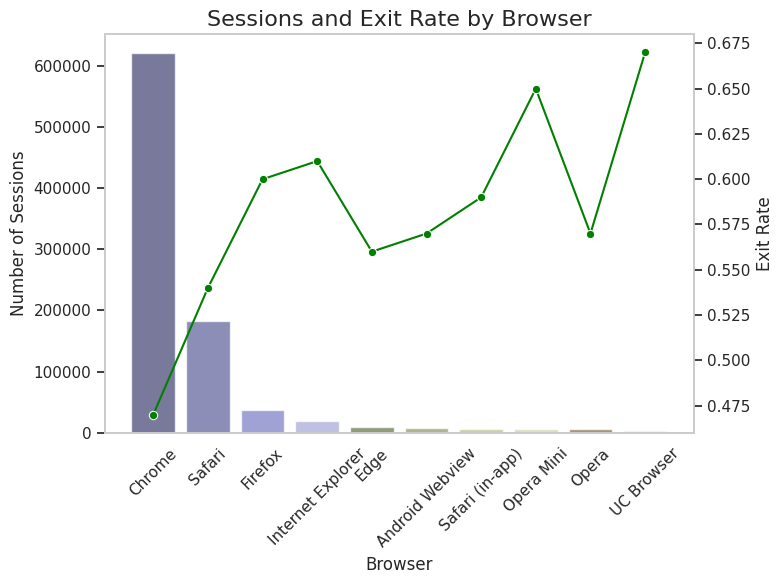

In [10]:
sns.set(style="whitegrid")

sns.set_palette("twilight")

fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(data=result, x="browser", y="sessions", palette="tab20b", ax=ax1, alpha=0.7)
ax1.set_ylabel("Number of Sessions", fontsize=12)
ax1.set_xlabel("Browser", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.set_title("Sessions and Exit Rate by Browser", fontsize=16)
ax1.grid(False)

ax2 = ax1.twinx()
sns.lineplot(data=result, x="browser", y="exit_rate", ax=ax2, color="green", marker="o")
ax2.set_ylabel("Exit Rate", fontsize=12)
ax2.grid(False)

plt.tight_layout()
plt.show()

### Device Performance

In [11]:
query_6 = ''' 
SELECT 
    device.deviceCategory AS device,
    COUNT(*) AS sessions,
    ROUND(SUM(totals.bounces)/COUNT(*), 2) AS exit_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hits
GROUP BY device
ORDER BY sessions DESC
'''
result = client.query(query_6).result().to_dataframe()
result

,device,sessions,exit_rate
0,desktop,3171344,0.10
1,mobile,838327,0.13
2,tablet,144004,0.11


**Desktop is the leading device in terms of sessions (3,171,344) and has the lowest exit rate (0.10), indicating strong user engagement. Both mobile (0.13 exit rate) and tablet (0.11 exit rate) also show relatively low exit rates, suggesting that users are not leaving quickly from these devices either. However, mobile and tablet sessions are considerably lower than desktop. To improve overall user retention, it's crucial to ensure a seamless and optimized experience across all devices, with a focus on enhancing mobile user experience to increase engagement and session length.**

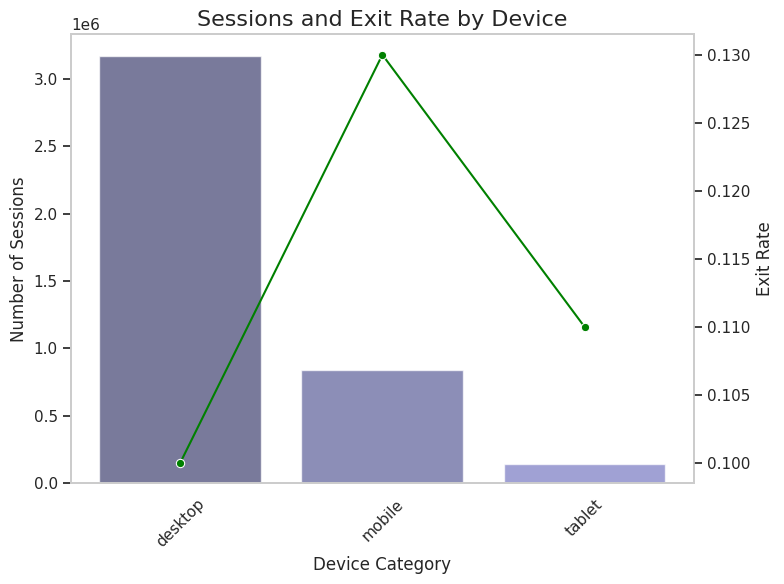

In [12]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(data=result, x="device", y="sessions", palette="tab20b", ax=ax1, alpha=0.7)
ax1.set_ylabel("Number of Sessions", fontsize=12)
ax1.set_xlabel("Device Category", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.set_title("Sessions and Exit Rate by Device", fontsize=16)
ax1.grid(False)

ax2 = ax1.twinx()
sns.lineplot(data=result, x="device", y="exit_rate", ax=ax2, color="green", marker="o")
ax2.set_ylabel("Exit Rate", fontsize=12)
ax2.grid(False)

plt.tight_layout()
plt.show()

### Traffic Channels Performance

In [13]:
query_7 = ''' 
WITH t1 AS (
SELECT 
    channelGrouping AS channel,
    COUNT(DISTINCT fullvisitorId) AS users,
    COUNT(DISTINCT CONCAT(fullvisitorId, CAST(visitId AS string), date)) AS sessions,
    COUNT(DISTINCT CASE WHEN hits.type = "PAGE" THEN CONCAT(fullvisitorID, cast(visitId as STRING), date, hits.hitNumber) END) AS pageviews,
    COUNT(DISTINCT hits.transaction.transactionId) as transactions,
    SUM(hits.transaction.transactionRevenue/1000000) AS total_revenue
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hits
GROUP BY channel
)
SELECT 
    channel, users, sessions, pageviews,
    ROUND(pageviews/sessions,0) AS pageviews_per_session,
    transactions, total_revenue,
    ROUND(transactions/sessions * 100, 2) AS conversion_rate
FROM t1
ORDER BY conversion_rate DESC
'''
result = client.query(query_7).result().to_dataframe()
result

,channel,users,sessions,pageviews,pageviews_per_session,transactions,total_revenue,conversion_rate
0,Referral,65661,104838,707597,7.0,5322,718641.25,5.08
1,Display,4103,6262,34202,5.0,143,130393.56,2.28
2,Paid Search,18702,25326,136060,5.0,469,47593.43,1.85
3,Direct,109830,143026,584840,4.0,2061,499267.03,1.44
4,Organic Search,311607,381561,1569218,4.0,3443,377737.81,0.90
5,(Other),90,120,442,4.0,1,11.99,0.83
6,Social,212374,226117,398690,2.0,104,8522.78,0.05
7,Affiliates,13400,16403,47417,3.0,9,654.38,0.05


**Referral channel performs the best in terms of both revenue and conversion rate (5.08%), making it a significant driver for the site. Organic Search brings in the most traffic with 311,607 users and 381,561 sessions but has a relatively low conversion rate (0.90%), suggesting room for optimization in terms of user engagement and conversion on landing pages. Direct traffic also generates substantial revenue but with a lower conversion rate of 1.44%, indicating a potential opportunity to refine the user journey to boost conversions.**

**In contrast, Social and Affiliates channels show the lowest performance with a conversion rate of 0.05%, signaling that these channels are underperforming in terms of driving actual transactions. To improve results, it would be beneficial to refine marketing strategies for these channels, potentially by targeting more relevant audiences or enhancing content to increase user engagement. By focusing on these areas, there is a significant opportunity to boost revenue and conversions across the site.**

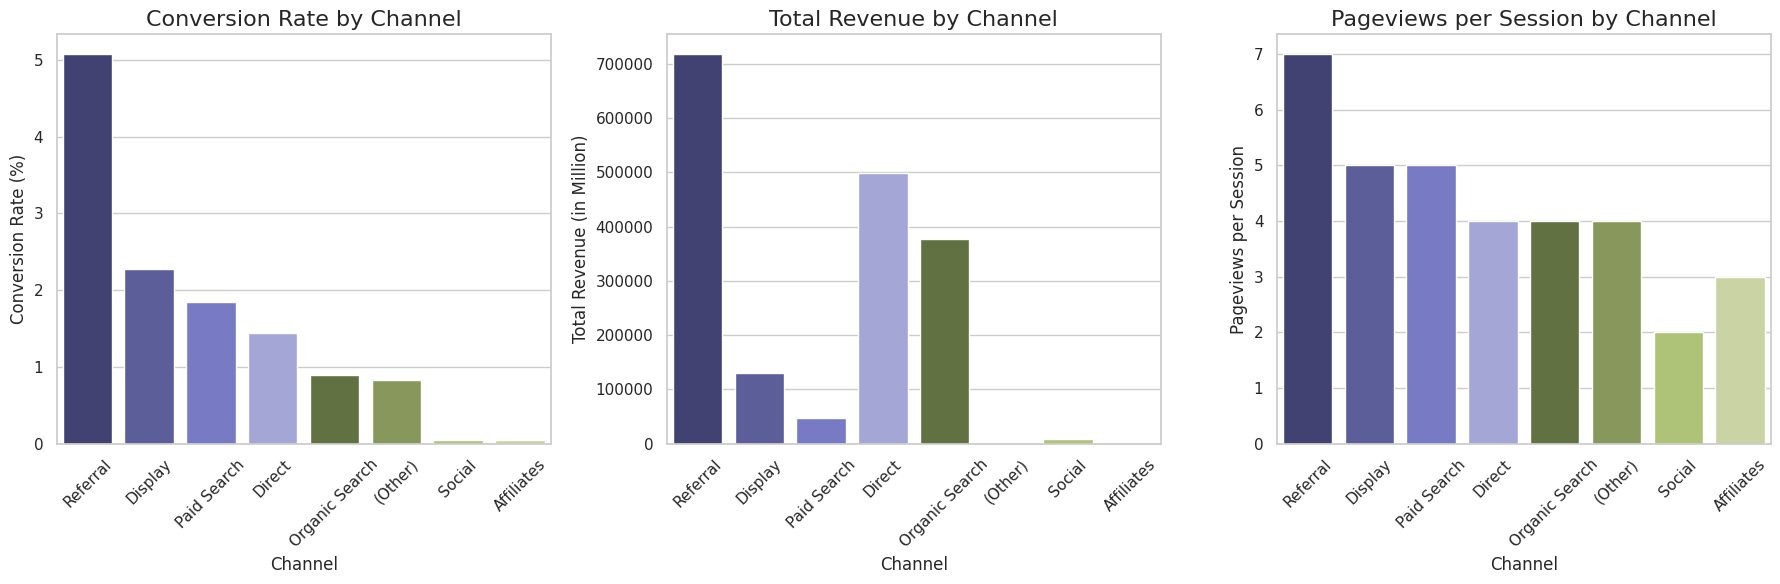

In [14]:
sns.set(style="whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=result, x="channel", y="conversion_rate", ax=ax1, palette="tab20b")
ax1.set_title("Conversion Rate by Channel", fontsize=16)
ax1.set_xlabel("Channel", fontsize=12)
ax1.set_ylabel("Conversion Rate (%)", fontsize=12)
ax1.tick_params(axis="x", rotation=45)

sns.barplot(data=result, x="channel", y="total_revenue", ax=ax2, palette="tab20b")
ax2.set_title("Total Revenue by Channel", fontsize=16)
ax2.set_xlabel("Channel", fontsize=12)
ax2.set_ylabel("Total Revenue (in Million)", fontsize=12)
ax2.tick_params(axis="x", rotation=45)

sns.barplot(data=result, x="channel", y="pageviews_per_session", ax=ax3, palette="tab20b")
ax3.set_title("Pageviews per Session by Channel", fontsize=16)
ax3.set_xlabel("Channel", fontsize=12)
ax3.set_ylabel("Pageviews per Session", fontsize=12)
ax3.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


### Hourly Traffic Analysis

In [15]:
query_8 = ''' 
SELECT 
    hits.hour AS hour,
    COUNT(*) AS sessions
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hits
WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
GROUP BY hour
ORDER BY hour
'''
result = client.query(query_8).result().to_dataframe()
result

,hour,sessions
0,0,10046
1,1,9258
2,2,7706
3,3,6959
4,4,7309
5,5,8934
6,6,11686
7,7,13689
8,8,16135
9,9,17912


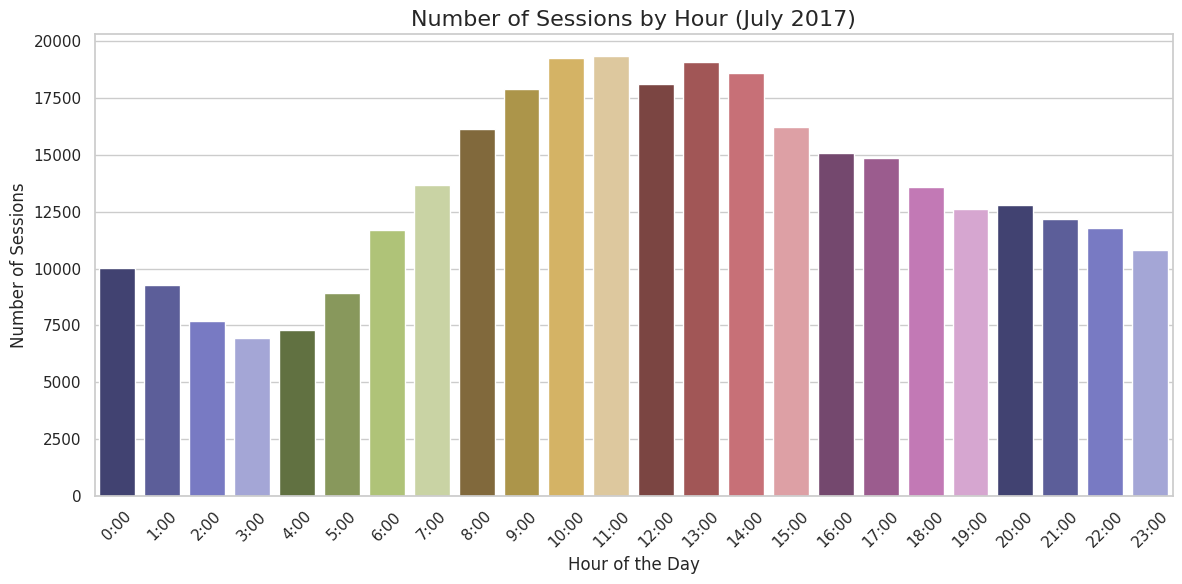

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=result, x="hour", y="sessions", palette="tab20b")

plt.title("Number of Sessions by Hour (July 2017)", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Sessions", fontsize=12)
plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(24)], rotation=45)
plt.tight_layout()

plt.show()

**Sessions peak around 10 AM with 19,254 sessions and remain relatively high throughout the late morning and early afternoon, with 12 PM also seeing a high of 18,131 sessions. The number of sessions starts to decline in the evening, with the lowest number of sessions occurring at 3 AM (6,959 sessions). This pattern suggests that website traffic is most active during daytime hours, particularly between 9 AM and 2 PM, and tapers off in the late evening and early morning.**

### Regional Revenue Contribution

In [17]:
query_9 = ''' 
SELECT 
    geoNetwork.continent AS region,
    SUM(totals.transactions) AS total_transactions,
    COUNT(totals.pageviews) AS total_views,
    SUM(hits.transaction.transactionRevenue/1000000000) AS total_revenue,
    ROUND(SUM(totals.transactions) / COUNT(totals.pageviews), 2) * 100 AS conversion_rate
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hits
GROUP BY region
ORDER BY total_views DESC
'''
result = client.query(query_9).result().to_dataframe()
result

,region,total_transactions,total_views,total_revenue,conversion_rate
0,Americas,487210,2831620,1744.26837,17.0
1,Asia,7031,634001,19.66593,1.0
2,Europe,3003,589077,7.48716,1.0
3,Oceania,662,58173,1.86323,1.0
4,Africa,247,36110,8.73576,1.0
5,(not set),206,4531,0.80178,5.0


**America stands out with a significant number of transactions (487,210) and the highest total revenue ($1,744.27), along with a strong conversion rate of 17%. This region clearly drives the majority of sales and has a high conversion efficiency. In contrast, Asia, Europe, Oceania, and Africa all show much lower transaction counts, revenue, and conversion rates, with Asia having the highest number of views (634,001) but only a single transaction.
To improve performance in underperforming regions, such as Asia and Europe, efforts should focus on increasing local engagement, improving regional targeting, and optimizing conversion paths to drive higher transaction volumes. Meanwhile, the Americas region, already performing well, should be further nurtured to maintain high conversion rates.**

In [18]:
query_10 = ''' 
SELECT CASE 
    WHEN hits.eCommerceAction.action_type = '1' THEN 'Click through of product lists'
    WHEN hits.eCommerceAction.action_type = '2' THEN 'Product detail views'
    WHEN hits.eCommerceAction.action_type = '5' THEN 'Check out'
    WHEN hits.eCommerceAction.action_type = '6' THEN 'Completed purchase' END AS action,
    COUNT(fullVisitorID) AS users
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hits
WHERE hits.eCommerceAction.action_type != '0' AND hits.eCommerceAction.action_type != '3' AND hits.eCommerceAction.action_type != '4'
GROUP BY action
ORDER BY users DESC
'''
result = client.query(query_10).result().to_dataframe()
result

,action,users
0,Click through of product lists,445760
1,Product detail views,362607
2,Check out,88019
3,Completed purchase,24532


In [19]:
funnel_graph = go.Figure(go.Funnel(y = result['action'], 
                          x = result['users'], 
                          textposition = 'inside', 
                          textinfo = 'value+percent initial'),
                layout=go.Layout(height=400, width=800)
               )
funnel_graph.update_layout(title_text = 'Google Merchandise Store Conversion Path', title_x=0.5, title_xanchor='center')

funnel_graph.show()

**Click-through of product lists leads with the highest number of users (445,760), indicating that many users engage with the product listings. Product detail views come second with 362,607 users, showing strong interest in exploring specific items. Of those who viewed the product details, 69% proceeded to the checkout stage (88,019 users). However, only 30% of users who reached the checkout page actually completed a purchase (24,532 users).**

**This suggests that while users are actively browsing products and moving toward checkout, there is a significant drop-off at the final purchase step. To improve conversions, it would be beneficial to focus on optimizing the checkout process, reducing friction, and providing incentives to encourage users to complete their purchases. Additionally, improving the transition from product details to checkout could help retain more users in the final stages of the funnel.**

In [20]:
query_11 = ''' 
SELECT 
    product.v2ProductCategory AS product_category, 
    COUNT(DISTINCT hits.transaction.transactionId) as transactions, 
    SUM(hits.transaction.transactionRevenue/1000000) AS total_revenue
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
    UNNEST(hits) AS hits, UNNEST(hits.product) AS product
GROUP BY product_category
ORDER BY total_revenue DESC
LIMIT 10
'''
result = client.query(query_11).result().to_dataframe()
result

,product_category,transactions,total_revenue
0,Apparel,5975,3599776.20
1,(not set),2390,1999668.28
2,Office,2721,1674651.05
3,Drinkware,2046,804183.53
4,Lifestyle,1173,681993.69
5,Bags,1147,521875.22
6,Electronics,878,435644.75
7,Notebooks & Journals,297,211350.06
8,Headgear,505,202492.31
9,Fun,67,94219.54


**The top 10 product categories show significant variation in performance. Apparel is the top performer, generating 5,975 transactions, followed by Office with 2,721 transactions. Categories like Drinkware, Lifestyle, and Bags show moderate performance, while Fun and Notebooks & Journals have significantly lower transactions and revenue. Despite being undefined, the (not set) category still contributes a substantial amount of revenue. To boost overall sales, it would be beneficial to focus on increasing the performance of underperforming categories.**

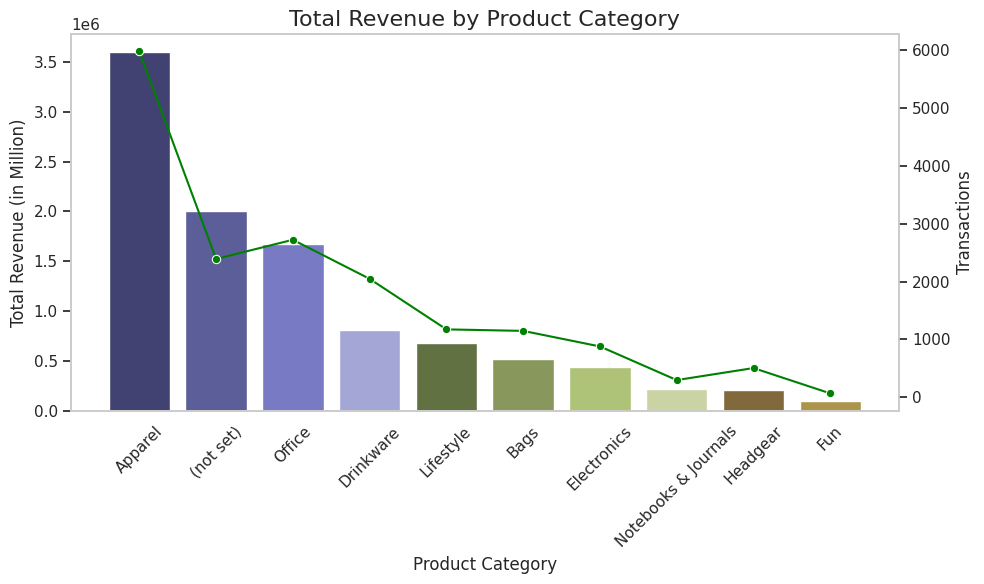

In [21]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(data=result, x="product_category", y="total_revenue", ax=ax1, palette="tab20b")
ax1.set_title("Total Revenue by Product Category", fontsize=16)
ax1.set_xlabel("Product Category", fontsize=12)
ax1.set_ylabel("Total Revenue (in Million)", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(False)

ax2 = ax1.twinx()
sns.lineplot(data=result, x="product_category", y="transactions", ax=ax2, color='green', marker='o')
ax2.set_ylabel("Transactions", fontsize=12)
ax2.tick_params(axis="y",)
ax2.grid(False)

plt.tight_layout()
plt.show()


### Conclusion

<p>The analysis across various aspects of user behavior, traffic sources, devices, and product categories provides a detailed overview of the site’s performance. The Apparel category stands out as the highest revenue generator, demonstrating the importance of capitalizing on successful categories while exploring opportunities for improvement in underperforming areas like Fun and Notebooks & Journals. Notably, there is a substantial drop-off between product detail views and completed purchases, suggesting that optimizing the checkout process and removing any barriers in the conversion funnel is crucial to boost final purchases.</p>
<p>Regionally, America leads with the highest revenue, while other regions like Asia and Europe lag behind in terms of transactions and revenue, signaling a potential need for region-specific strategies to improve engagement and sales. Traffic channels such as Referral show strong performance, but there is room to improve channels like Social and Affiliates, which exhibit lower conversion rates, potentially by refining targeting strategies or enhancing user engagement.</p>
<p>In summary, by focusing on optimizing user experience, improving conversion rates in key regions, and enhancing underperforming categories and channels, the overall performance of the site can be significantly strengthened. Addressing these areas will not only help increase revenue but also improve user engagement, ultimately leading to a more efficient and profitable online platform.</p>